<a href="https://colab.research.google.com/github/eduardopadilla3/Unit2_BW_code/blob/master/Unit2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from time import strftime
import os

curr_path = os.getcwd()
csv_name = 'str_hilo_twist.csv'
output_file = '%s\\data\\%s' % (curr_path,csv_name)
error_file = '%s\\error.txt' % (curr_path)
if os.path.exists(output_file):
    os.remove(output_file)
if os.path.exists(error_file):
    os.remove(error_file)

ou_hdc = 'OU25'

# Match date
from datetime import datetime, timedelta, date, time
current_match_date = datetime.now()
current_time = datetime.now().time()
if current_time >= time(0,0) and current_time <= time(11, 30):
    previous_day = current_match_date - timedelta(days=1)
    current_match_date = previous_day
db_match_date = current_match_date.strftime("%Y%m%d")
current_match_date = current_match_date.strftime("%Y-%m-%d 11:30:00")

print('Last execution time: %s' % strftime('%Y-%m-%d %H:%M:%S'))

Last execution time: 2020-10-07 22:12:14


In [2]:
import cx_Oracle
import codecs

db_user = 'JW'
db_password = '901203'
db_dsn = 'HOME-PC/XE'
db_encoding = 'UTF-8'

# Database connection
connection = None
try:
    connection = cx_Oracle.connect(
        db_user,
        db_password,
        db_dsn,
        encoding=db_encoding)

    c = connection.cursor()
    file = codecs.open(output_file, "a+", "utf-8")

    # write file header
    file.write('MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,TOTAL_GOAL_COUNT,ML_TYPE,STR_OU_MODE_HDC,STR_OU_MACAU_HDC,STR_OU_BET365_HDC,STR_OU_YINGYO_HDC,STR_OU_PINGBOK_HDC,STR_OU_HKJC_HDC,STR_OU_AVG_HI,STR_OU_MEDIAN_HI,STR_OU_MACAU_HI,STR_OU_BET365_HI,STR_OU_YINGWO_HI,STR_OU_PINGBOK_HI,STR_OU_HKJC_HI,STR_OU_MACAU_HI_DIFF,STR_OU_BET365_HI_DIFF,STR_OU_YINGWO_HI_DIFF,STR_OU_PINGBOK_HI_DIFF,STR_OU_HKJC_HI_DIFF,STR_OU_AVG_LO,STR_OU_MEDIAN_LO,STR_OU_MACAU_LO,STR_OU_BET365_LO,STR_OU_YINGWO_LO,STR_OU_PINGBOK_LO,STR_OU_HKJC_LO,STR_OU_MACAU_LO_DIFF,STR_OU_BET365_LO_DIFF,STR_OU_YINGWO_LO_DIFF,STR_OU_PINGBOK_LO_DIFF,STR_OU_HKJC_LO_DIFF,HOME_TOTAL_GF,HOME_TOTAL_GA,HOME_AVG_GF,HOME_HOME_GF,HOME_HOME_GA,HOME_HOME_AVG_GF,AWAY_TOTAL_GF,AWAY_TOTAL_GA,AWAY_AVG_GF,AWAY_AWAY_GF,AWAY_AWAY_GA,AWAY_AWAY_AVG_GF,HOME_ADV,AWAY_ADV,GAME_POINT,STR_MACAU_H,STR_BET365_H,STR_YINGWO_H,STR_PINNACLE_H,STR_HKJC_H,STR_MACAU_D,STR_BET365_D,STR_YINGWO_D,STR_PINNACLE_D,STR_HKJC_D,STR_MACAU_A,STR_BET365_A,STR_YINGWO_A,STR_PINNACLE_A,STR_HKJC_A\n')
    sql = """
        SELECT
            info.MATCH_ID, info.MATCH_DATETIME, info.LEAGUE, info.HOME_TEAM, info.AWAY_TEAM, info.HOME_FT_GOAL, info.AWAY_FT_GOAL, info.HOME_FT_GOAL+info.AWAY_FT_GOAL AS TOTAL_GOAL_COUNT, 
            CASE 
                WHEN info.MATCH_DATETIME < TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TRAIN'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'VALID'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') THEN 'TEST'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') THEN 'PREDICT'
            END AS ML_TYPE, 
            hilo.STR_MODE_HDC AS STR_OU_MODE_HDC, hilo.STR_MACAU_HDC AS STR_OU_MACAU_HDC, hilo.STR_BET365_HDC AS STR_OU_BET365_HDC, hilo.STR_YINGYO_HDC AS STR_OU_YINGYO_HDC, hilo.STR_PINGBOK_HDC AS STR_OU_PINGBOK_HDC, hilo.STR_HKJC_HDC AS STR_OU_HKJC_HDC, 
            ROUND(hilo.STR_O_AVG_HI,4) AS STR_OU_AVG_HI, hilo.STR_O_MEDIAN_HI AS STR_OU_MEDIAN_HI, hilo.STR_O_MACAU_HI AS STR_OU_MACAU_HI, hilo.STR_O_BET365_HI AS STR_OU_BET365_HI, hilo.STR_O_YINGYO_HI AS STR_OU_YINGWO_HI, hilo.STR_O_PINGBOK_HI AS STR_OU_PINGBOK_HI, hilo.STR_O_HKJC_HI AS STR_OU_HKJC_HI, 
            ROUND((hilo.STR_O_MACAU_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_MACAU_HI_DIFF, ROUND((hilo.STR_O_BET365_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_BET365_HI_DIFF, ROUND((hilo.STR_O_YINGYO_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_YINGWO_HI_DIFF, ROUND((hilo.STR_O_PINGBOK_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_PINGBOK_HI_DIFF, ROUND((hilo.STR_O_HKJC_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_HKJC_HI_DIFF, 
            ROUND(hilo.STR_O_AVG_LO,4) AS STR_OU_AVG_LO, hilo.STR_O_MEDIAN_LO AS STR_OU_MEDIAN_LO, hilo.STR_O_MACAU_LO AS STR_OU_MACAU_LO, hilo.STR_O_BET365_LO AS STR_OU_BET365_LO, hilo.STR_O_YINGYO_LO AS STR_OU_YINGWO_LO, hilo.STR_O_PINGBOK_LO AS STR_OU_PINGBOK_LO, hilo.STR_O_HKJC_LO AS STR_OU_HKJC_LO, 
            ROUND((hilo.STR_O_MACAU_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_MACAU_LO_DIFF, ROUND((hilo.STR_O_BET365_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_BET365_LO_DIFF, ROUND((hilo.STR_O_YINGYO_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_YINGWO_LO_DIFF, ROUND((hilo.STR_O_PINGBOK_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_PINGBOK_LO_DIFF, ROUND((hilo.STR_O_HKJC_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_HKJC_LO_DIFF, 
            recent.HOME_TOTAL_GF, recent.HOME_TOTAL_GA, ROUND(recent.HOME_AVG_GF,4) AS HOME_AVG_GF, recent.HOME_HOME_GF, recent.HOME_HOME_GA, ROUND(recent.HOME_HOME_AVG_GF,4) AS HOME_HOME_AVG_GF, 
            recent.AWAY_TOTAL_GF, recent.AWAY_TOTAL_GA, ROUND(recent.AWAY_AVG_GF,4) AS AWAY_AVG_GF, recent.AWAY_AWAY_GF, recent.AWAY_AWAY_GA, ROUND(recent.AWAY_AWAY_AVG_GF,4) AS AWAY_AWAY_AVG_GF, 
            (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10 AS HOME_ADV, (recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS AWAY_ADV, (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10+(recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS GAME_POINT, 
            macau.HOME_ODD AS STR_MACAU_H, bet365.HOME_ODD AS STR_BET365_H, yingwo.HOME_ODD AS STR_YINGWO_H, pinnacle.HOME_ODD AS STR_PINNACLE_H, hkjc.HOME_ODD AS STR_HKJC_H, 
            macau.DRAW_ODD AS STR_MACAU_D, bet365.DRAW_ODD AS STR_BET365_D, yingwo.DRAW_ODD AS STR_YINGWO_D, pinnacle.DRAW_ODD AS STR_PINNACLE_D, hkjc.DRAW_ODD AS STR_HKJC_D, 
            macau.AWAY_ODD AS STR_MACAU_A, bet365.AWAY_ODD AS STR_BET365_A, yingwo.AWAY_ODD AS STR_YINGWO_A, pinnacle.AWAY_ODD AS STR_PINNACLE_A, hkjc.AWAY_ODD AS STR_HKJC_A 
        FROM
            HILO_MERGE2 hilo, RECENT_RAW recent, MATCH_INFO info, HDA_RAW macau, HDA_RAW bet365, HDA_RAW yingwo, HDA_RAW pinnacle, HDA_RAW hkjc
        WHERE
            info.MATCH_ID=hilo.MATCH_ID AND info.MATCH_ID=recent.MATCH_ID AND info.MATCH_ID=macau.MATCH_ID AND info.MATCH_ID=bet365.MATCH_ID AND info.MATCH_ID=yingwo.MATCH_ID AND info.MATCH_ID=pinnacle.MATCH_ID AND info.MATCH_ID=hkjc.MATCH_ID
            AND macau.BOOKMAKER='澳门' AND bet365.BOOKMAKER='bet365' AND yingwo.BOOKMAKER='盈禾' AND pinnacle.BOOKMAKER='Pinnacle' AND hkjc.BOOKMAKER='香港马会'
            AND macau.HANDICAP_TYPE=0 AND bet365.HANDICAP_TYPE=0 AND yingwo.HANDICAP_TYPE=0 AND pinnacle.HANDICAP_TYPE=0 AND hkjc.HANDICAP_TYPE=0
            AND hilo.STR_MODE_HDC IS NOT NULL AND hilo.STR_MACAU_HDC IS NOT NULL AND hilo.STR_BET365_HDC IS NOT NULL AND hilo.STR_YINGYO_HDC IS NOT NULL AND hilo.STR_PINGBOK_HDC IS NOT NULL AND hilo.STR_HKJC_HDC IS NOT NULL 
            AND ROUND(hilo.STR_O_AVG_HI,4) IS NOT NULL AND hilo.STR_O_MEDIAN_HI IS NOT NULL AND hilo.STR_O_MACAU_HI IS NOT NULL AND hilo.STR_O_BET365_HI IS NOT NULL AND hilo.STR_O_YINGYO_HI IS NOT NULL AND hilo.STR_O_PINGBOK_HI IS NOT NULL AND hilo.STR_O_HKJC_HI IS NOT NULL 
            AND ROUND(hilo.STR_O_AVG_LO,4) IS NOT NULL AND hilo.STR_O_MEDIAN_LO IS NOT NULL AND hilo.STR_O_MACAU_LO IS NOT NULL AND hilo.STR_O_BET365_LO IS NOT NULL AND hilo.STR_O_YINGYO_LO IS NOT NULL AND hilo.STR_O_PINGBOK_LO IS NOT NULL AND hilo.STR_O_HKJC_LO IS NOT NULL 
            AND recent.HOME_TOTAL_GF IS NOT NULL AND recent.HOME_TOTAL_GA IS NOT NULL AND ROUND(recent.HOME_AVG_GF,4) IS NOT NULL AND recent.HOME_HOME_GF IS NOT NULL AND recent.HOME_HOME_GA IS NOT NULL AND ROUND(recent.HOME_HOME_AVG_GF,4) IS NOT NULL 
            AND recent.AWAY_TOTAL_GF IS NOT NULL AND recent.AWAY_TOTAL_GA IS NOT NULL AND ROUND(recent.AWAY_AVG_GF,4) IS NOT NULL AND recent.AWAY_AWAY_GF IS NOT NULL AND recent.AWAY_AWAY_GA IS NOT NULL AND ROUND(recent.AWAY_AWAY_AVG_GF,4) IS NOT NULL 
            AND (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10 IS NOT NULL AND (recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 IS NOT NULL AND (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10+(recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 IS NOT NULL 
            AND macau.HOME_ODD IS NOT NULL AND bet365.HOME_ODD IS NOT NULL AND yingwo.HOME_ODD IS NOT NULL AND pinnacle.HOME_ODD IS NOT NULL AND hkjc.HOME_ODD IS NOT NULL 
            AND macau.DRAW_ODD IS NOT NULL AND bet365.DRAW_ODD IS NOT NULL AND yingwo.DRAW_ODD IS NOT NULL AND pinnacle.DRAW_ODD IS NOT NULL AND hkjc.DRAW_ODD IS NOT NULL 
            AND macau.AWAY_ODD IS NOT NULL AND bet365.AWAY_ODD IS NOT NULL AND yingwo.AWAY_ODD IS NOT NULL AND pinnacle.AWAY_ODD IS NOT NULL AND hkjc.AWAY_ODD IS NOT NULL 
            AND hilo.STR_MODE_HDC=hilo.STR_HKJC_HDC
            AND hilo.STR_O_AVG_LO<hilo.STR_O_AVG_HI AND hilo.STR_O_HKJC_HI<hilo.STR_O_HKJC_LO
            AND (info.MATCH_DATETIME >= TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') OR (info.MATCH_DATETIME < TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') AND info.HOME_FT_GOAL IS NOT NULL))
        ORDER BY info.MATCH_DATETIME, info.MATCH_ID
        """ % (current_match_date, current_match_date, current_match_date, current_match_date)
        
    c.execute(sql)
    result = c.fetchall()
    for row in result:
        ft_home_goal = row[5]
        ft_away_goal = row[6]
        total_goal = row[7]
        if row[5] == None:
            ft_home_goal = ''
        if row[6] == None:
            ft_away_goal = ''
        if row[7] == None:
            total_goal = ''
        file.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n' % (row[0],row[1],row[2],row[3],row[4],ft_home_goal,ft_away_goal,total_goal,row[8],row[9],row[10],row[11],row[12],row[13],row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row[22],row[23],row[24],row[25],row[26],row[27],row[28],row[29],row[30],row[31],row[32],row[33],row[34],row[35],row[36],row[37],row[38],row[39],row[40],row[41],row[42],row[43],row[44],row[45],row[46],row[47],row[48],row[49],row[50],row[51],row[52],row[53],row[54],row[55],row[56],row[57],row[58],row[59],row[60],row[61],row[62],row[63],row[64],row[65],row[66],row[67],row[68]))

    file.close()

except cx_Oracle.Error as error:
    file.close()
    err_file = codecs.open(error_file, 'a+', 'utf-8')
    err_file.write('[%s] Oracle error - %s\n' % (strftime('%Y-%m-%d %H:%M:%S'), error))
    err_file.close()
except:
    file.close()

In [3]:
import pandas as pd
from datetime import datetime

In [4]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 3000)

In [5]:
#load datasets
df = pd.read_csv('data/%s' % csv_name, sep=',')

In [6]:
# #final feature selection
df = df[['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','ML_TYPE','STR_OU_MODE_HDC','STR_OU_MACAU_HDC','STR_OU_BET365_HDC','STR_OU_YINGYO_HDC','STR_OU_PINGBOK_HDC','STR_OU_HKJC_HDC','STR_OU_AVG_HI','STR_OU_MEDIAN_HI','STR_OU_MACAU_HI','STR_OU_BET365_HI','STR_OU_YINGWO_HI','STR_OU_PINGBOK_HI','STR_OU_HKJC_HI','STR_OU_MACAU_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_HKJC_HI_DIFF','STR_OU_AVG_LO','STR_OU_MEDIAN_LO','STR_OU_MACAU_LO','STR_OU_BET365_LO','STR_OU_YINGWO_LO','STR_OU_PINGBOK_LO','STR_OU_HKJC_LO','STR_OU_MACAU_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_HKJC_LO_DIFF','HOME_TOTAL_GF','HOME_TOTAL_GA','HOME_AVG_GF','HOME_HOME_GF','HOME_HOME_GA','HOME_HOME_AVG_GF','AWAY_TOTAL_GF','AWAY_TOTAL_GA','AWAY_AVG_GF','AWAY_AWAY_GF','AWAY_AWAY_GA','AWAY_AWAY_AVG_GF','HOME_ADV','AWAY_ADV','GAME_POINT','STR_MACAU_H','STR_BET365_H','STR_YINGWO_H','STR_PINNACLE_H','STR_HKJC_H','STR_MACAU_D','STR_BET365_D','STR_YINGWO_D','STR_PINNACLE_D','STR_HKJC_D','STR_MACAU_A','STR_BET365_A','STR_YINGWO_A','STR_PINNACLE_A','STR_HKJC_A']]

df['OU25'] = [1 if x > 2.5 else 0 for x in df['TOTAL_GOAL_COUNT']]

In [7]:
# df.tail()

In [8]:
df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT'], axis=1)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import category_encoders as ce
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [10]:
#Split train and test datasets

X = df1
X_train = df1.query('ML_TYPE == "TRAIN"')
X_val = df1.query('ML_TYPE == "VALID"')
X_test = df1.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')
y_train = X_train.pop(ou_hdc)
y_val = X_val.pop(ou_hdc)
y_test = X_test.pop(ou_hdc)

In [11]:
#confirm size of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(174, 61)
(55, 61)
(70, 61)
(174,)
(55,)
(70,)


In [12]:
# Baseline
y_train.value_counts(normalize=True)

1    0.563218
0    0.436782
Name: OU25, dtype: float64

In [13]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [15]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0255 ± 0.0178,AWAY_AVG_GF
0.0218 ± 0.0424,STR_OU_MACAU_HI_DIFF
0.0218 ± 0.0272,STR_HKJC_D
0.0218 ± 0.0145,STR_PINNACLE_D
0.0218 ± 0.0356,STR_OU_BET365_HI_DIFF
0.0182 ± 0.0230,HOME_HOME_GA
0.0182 ± 0.0514,HOME_HOME_AVG_GF
0.0145 ± 0.0145,AWAY_ADV
0.0109 ± 0.0371,HOME_TOTAL_GF
0.0109 ± 0.0291,HOME_AVG_GF


In [16]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=20, random_state=42, n_jobs=-1)
)

model1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ML_TYPE'],
                                mapping=[{'col': 'ML_TYPE',
                                          'data_type': dtype('O'),
                                          'mapping': TRAIN    1
NaN     -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=-1, num_parallel_tree

In [17]:
print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 1.0
Validation Accuracy: 0.6181818181818182
Test Accuracy: 0.5142857142857142


In [18]:
model2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5636363636363636
test accuracy: 0.4857142857142857


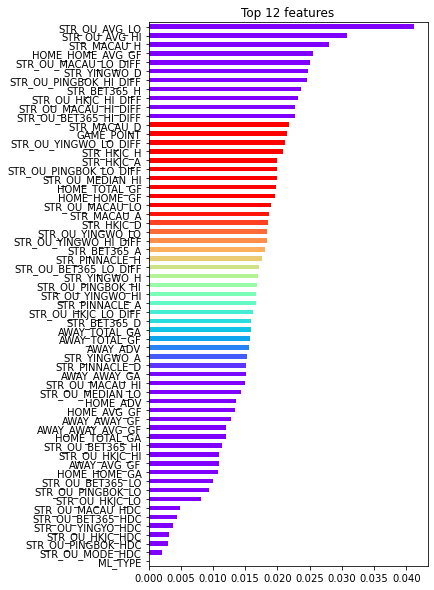

In [19]:
# Get feature importances
rf = model2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n = 12
plt.figure(figsize=(5,10))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [20]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=800, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.6494252873563219
Validation Accuracy: 0.45454545454545453
Test Accuracy: 0.42857142857142855


In [21]:
#remove negative features
#X_train = X_train[['STR_HKJC_D','HOME_HOME_AVG_GF','STR_MACAU_D','STR_YINGWO_D','STR_OU_PINGBOK_HDC','STR_YINGWO_H','AWAY_AWAY_AVG_GF','STR_OU_MACAU_HDC','STR_MACAU_H','STR_MACAU_A','AWAY_AVG_GF','STR_OU_HKJC_HI','HOME_AVG_GF']]
#X_val = X_val[['STR_HKJC_D','HOME_HOME_AVG_GF','STR_MACAU_D','STR_YINGWO_D','STR_OU_PINGBOK_HDC','STR_YINGWO_H','AWAY_AWAY_AVG_GF','STR_OU_MACAU_HDC','STR_MACAU_H','STR_MACAU_A','AWAY_AVG_GF','STR_OU_HKJC_HI','HOME_AVG_GF']]
#X_test = X_test[['STR_HKJC_D','HOME_HOME_AVG_GF','STR_MACAU_D','STR_YINGWO_D','STR_OU_PINGBOK_HDC','STR_YINGWO_H','AWAY_AWAY_AVG_GF','STR_OU_MACAU_HDC','STR_MACAU_H','STR_MACAU_A','AWAY_AVG_GF','STR_OU_HKJC_HI','HOME_AVG_GF']]

# X_train = X_train[['STR_OU_MACAU_LO_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_MACAU_HI_DIFF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_PINNACLE_D','STR_OU_AVG_LO','STR_OU_AVG_HI']]
# X_val = X_val[['STR_OU_MACAU_LO_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_MACAU_HI_DIFF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_PINNACLE_D','STR_OU_AVG_LO','STR_OU_AVG_HI']]
# X_test = X_test[['STR_OU_MACAU_LO_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_MACAU_HI_DIFF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_PINNACLE_D','STR_OU_AVG_LO','STR_OU_AVG_HI']]

# X_train = X_train[['STR_HKJC_D','STR_OU_MODE_HDC','STR_OU_MACAU_HDC','AWAY_AVG_GF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_BET365_D','STR_OU_PINGBOK_LO_DIFF','STR_PINNACLE_D','STR_YINGWO_A','STR_MACAU_D','STR_OU_BET365_HDC','STR_OU_HKJC_LO','AWAY_AWAY_GF','STR_OU_BET365_LO_DIFF','STR_YINGWO_H','STR_BET365_H','HOME_TOTAL_GF','STR_OU_YINGYO_HDC','STR_HKJC_A','AWAY_TOTAL_GF','STR_OU_PINGBOK_HI','STR_BET365_A','STR_OU_YINGWO_HI','AWAY_TOTAL_GA','STR_OU_PINGBOK_LO','STR_OU_PINGBOK_HDC','STR_OU_MACAU_HI_DIFF','AWAY_ADV','STR_OU_MEDIAN_LO','STR_OU_AVG_HI','STR_OU_YINGWO_LO_DIFF','STR_OU_HKJC_HI','STR_PINNACLE_H','STR_OU_HKJC_HDC','STR_OU_MACAU_LO_DIFF','STR_MACAU_A','HOME_TOTAL_GA','STR_HKJC_H','AWAY_AWAY_GA','HOME_ADV','HOME_HOME_GF','HOME_HOME_AVG_GF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI']]
# X_val = X_val[['STR_HKJC_D','STR_OU_MODE_HDC','STR_OU_MACAU_HDC','AWAY_AVG_GF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_BET365_D','STR_OU_PINGBOK_LO_DIFF','STR_PINNACLE_D','STR_YINGWO_A','STR_MACAU_D','STR_OU_BET365_HDC','STR_OU_HKJC_LO','AWAY_AWAY_GF','STR_OU_BET365_LO_DIFF','STR_YINGWO_H','STR_BET365_H','HOME_TOTAL_GF','STR_OU_YINGYO_HDC','STR_HKJC_A','AWAY_TOTAL_GF','STR_OU_PINGBOK_HI','STR_BET365_A','STR_OU_YINGWO_HI','AWAY_TOTAL_GA','STR_OU_PINGBOK_LO','STR_OU_PINGBOK_HDC','STR_OU_MACAU_HI_DIFF','AWAY_ADV','STR_OU_MEDIAN_LO','STR_OU_AVG_HI','STR_OU_YINGWO_LO_DIFF','STR_OU_HKJC_HI','STR_PINNACLE_H','STR_OU_HKJC_HDC','STR_OU_MACAU_LO_DIFF','STR_MACAU_A','HOME_TOTAL_GA','STR_HKJC_H','AWAY_AWAY_GA','HOME_ADV','HOME_HOME_GF','HOME_HOME_AVG_GF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI']]
# X_test = X_test[['STR_HKJC_D','STR_OU_MODE_HDC','STR_OU_MACAU_HDC','AWAY_AVG_GF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_BET365_D','STR_OU_PINGBOK_LO_DIFF','STR_PINNACLE_D','STR_YINGWO_A','STR_MACAU_D','STR_OU_BET365_HDC','STR_OU_HKJC_LO','AWAY_AWAY_GF','STR_OU_BET365_LO_DIFF','STR_YINGWO_H','STR_BET365_H','HOME_TOTAL_GF','STR_OU_YINGYO_HDC','STR_HKJC_A','AWAY_TOTAL_GF','STR_OU_PINGBOK_HI','STR_BET365_A','STR_OU_YINGWO_HI','AWAY_TOTAL_GA','STR_OU_PINGBOK_LO','STR_OU_PINGBOK_HDC','STR_OU_MACAU_HI_DIFF','AWAY_ADV','STR_OU_MEDIAN_LO','STR_OU_AVG_HI','STR_OU_YINGWO_LO_DIFF','STR_OU_HKJC_HI','STR_PINNACLE_H','STR_OU_HKJC_HDC','STR_OU_MACAU_LO_DIFF','STR_MACAU_A','HOME_TOTAL_GA','STR_HKJC_H','AWAY_AWAY_GA','HOME_ADV','HOME_HOME_GF','HOME_HOME_AVG_GF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI']]

X_train = X_train[['AWAY_AVG_GF','STR_OU_MACAU_HI_DIFF','STR_HKJC_D','STR_PINNACLE_D','STR_OU_BET365_HI_DIFF','HOME_HOME_GA','HOME_HOME_AVG_GF','AWAY_ADV','HOME_TOTAL_GF','HOME_AVG_GF','STR_HKJC_A','HOME_ADV','STR_OU_HKJC_LO','STR_OU_YINGWO_HI','STR_OU_YINGWO_LO','STR_YINGWO_D','STR_BET365_A','AWAY_TOTAL_GA','HOME_TOTAL_GA','STR_OU_MEDIAN_LO','STR_OU_HKJC_HDC','STR_OU_YINGYO_HDC','STR_OU_BET365_LO','STR_OU_PINGBOK_LO','STR_OU_BET365_HDC','STR_OU_MACAU_HDC']]
X_val = X_val[['AWAY_AVG_GF','STR_OU_MACAU_HI_DIFF','STR_HKJC_D','STR_PINNACLE_D','STR_OU_BET365_HI_DIFF','HOME_HOME_GA','HOME_HOME_AVG_GF','AWAY_ADV','HOME_TOTAL_GF','HOME_AVG_GF','STR_HKJC_A','HOME_ADV','STR_OU_HKJC_LO','STR_OU_YINGWO_HI','STR_OU_YINGWO_LO','STR_YINGWO_D','STR_BET365_A','AWAY_TOTAL_GA','HOME_TOTAL_GA','STR_OU_MEDIAN_LO','STR_OU_HKJC_HDC','STR_OU_YINGYO_HDC','STR_OU_BET365_LO','STR_OU_PINGBOK_LO','STR_OU_BET365_HDC','STR_OU_MACAU_HDC']]
X_test = X_test[['AWAY_AVG_GF','STR_OU_MACAU_HI_DIFF','STR_HKJC_D','STR_PINNACLE_D','STR_OU_BET365_HI_DIFF','HOME_HOME_GA','HOME_HOME_AVG_GF','AWAY_ADV','HOME_TOTAL_GF','HOME_AVG_GF','STR_HKJC_A','HOME_ADV','STR_OU_HKJC_LO','STR_OU_YINGWO_HI','STR_OU_YINGWO_LO','STR_YINGWO_D','STR_BET365_A','AWAY_TOTAL_GA','HOME_TOTAL_GA','STR_OU_MEDIAN_LO','STR_OU_HKJC_HDC','STR_OU_YINGYO_HDC','STR_OU_BET365_LO','STR_OU_PINGBOK_LO','STR_OU_BET365_HDC','STR_OU_MACAU_HDC']]

In [22]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=12, random_state=42, n_jobs=-1, learning_rate=0.097, subsample=1)
)

model1.fit(X_train, y_train)

print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 0.9712643678160919
Validation Accuracy: 0.509090909090909
Test Accuracy: 0.4


In [23]:
model2 = Pipeline([
                  ('oe', ce.OrdinalEncoder()),
                  ('impute', SimpleImputer(strategy='mean')),
                  ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.6727272727272727
test accuracy: 0.5142857142857142


In [24]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [26]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0982 ± 0.0291,STR_HKJC_D
0.0982 ± 0.0178,STR_OU_YINGWO_LO
0.0800 ± 0.0436,HOME_TOTAL_GF
0.0691 ± 0.0482,STR_BET365_A
0.0655 ± 0.0713,STR_PINNACLE_D
0.0582 ± 0.0424,STR_OU_PINGBOK_LO
0.0582 ± 0.0424,STR_HKJC_A
0.0509 ± 0.0482,HOME_ADV
0.0509 ± 0.0482,HOME_HOME_AVG_GF
0.0509 ± 0.0272,STR_OU_YINGWO_HI


In [27]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=800, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.6091954022988506
Validation Accuracy: 0.4727272727272727
Test Accuracy: 0.45714285714285713


In [28]:
import matplotlib.pyplot as plt


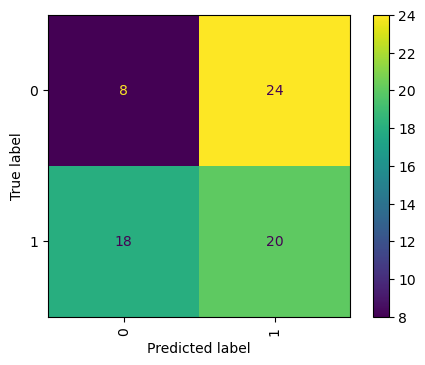

In [29]:
#Confusion graph
from sklearn.metrics import plot_confusion_matrix, classification_report

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(model1, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [30]:
# df1.tail()

In [31]:
final = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_OU_MACAU_HDC', 'STR_OU_MACAU_HI', 'STR_OU_MACAU_LO', 'STR_OU_HKJC_HDC', 'STR_OU_HKJC_HI', 'STR_OU_HKJC_LO', 'TOTAL_GOAL_COUNT', ou_hdc]]

final = final.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')

In [32]:
y_pred = model1.predict(X_test)
class_probabilities = model1.predict_proba(X_test)

pred = pd.DataFrame(y_pred, columns=['pred'])
prob = pd.DataFrame(class_probabilities, columns=['prob0','prob1' ])

final.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
prob.reset_index(drop=True, inplace=True)

fin = pd.concat([final, prob, pred], axis=1)


In [33]:
# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob0'] >= 0.6:
#         print(fin.loc[[i]])
#         print('%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s' % (fin.loc[i, 'MATCH_DATETIME'],fin.loc[i, 'HOME_TEAM'],fin.loc[i, 'AWAY_TEAM'],fin.loc[i, 'HOME_FT_GOAL'],fin.loc[i, 'AWAY_FT_GOAL'],fin.loc[i, 'STR_HKJC_HILO_HANDICAP'],fin.loc[i, 'STR_HKJC_HILO_HI'],fin.loc[i, 'STR_HKJC_HILO_LO'],fin.loc[i, 'TOTAL_GOAL_COUNT'],fin.loc[i, 'OU25'],fin.loc[i, 'prob0'],fin.loc[i, 'prob1'],fin.loc[i, 'pred']))

In [34]:
# fin['Correct'] = (fin[ou_hdc] == fin['pred']).astype(int)


In [35]:
#def a(fin):
#    if (fin['prob0'] >= 0.55 or fin['prob1'] >= 0.55):
#        return 1
#    else:
#      return 0
#fin = fin.assign(O55=fin.apply(a, axis=1))

In [36]:
bet_amount = 500

home_goal_col = 'HOME_FT_GOAL'
away_goal_col = 'AWAY_FT_GOAL'

macau_hdc_col = 'STR_OU_MACAU_HDC'
macau_hi_col = 'STR_OU_MACAU_HI'
macau_lo_col = 'STR_OU_MACAU_LO'

hkjc_hdc_col = 'STR_OU_HKJC_HDC'
hkjc_hi_col = 'STR_OU_HKJC_HI'
hkjc_lo_col = 'STR_OU_HKJC_LO'

In [37]:
# fin['Correct'] = (fin[ou_hdc] == fin['pred']).astype(int)
import math

for i,j in fin.iterrows():
    if fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
        fin.loc[i, 'Correct_MS'] = str('1')
    elif fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
        fin.loc[i, 'Correct_MS'] = str('-')
    elif math.isnan(fin.loc[i, home_goal_col]):
        fin.loc[i, home_goal_col] = None
        fin.loc[i, away_goal_col] = None
        fin.loc[i, ou_hdc] = None
        fin.loc[i, 'Correct_MS'] = str('NaN')
    else:
        fin.loc[i, 'Correct_MS'] = str('0')
        
    if fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
        fin.loc[i, 'Correct_JC'] = str('1')
    elif fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
        fin.loc[i, 'Correct_JC'] = str('-')
    elif math.isnan(fin.loc[i, home_goal_col]):
        fin.loc[i, home_goal_col] = None
        fin.loc[i, away_goal_col] = None
        fin.loc[i, ou_hdc] = None
        fin.loc[i, 'Correct_JC'] = str('NaN')
    else:
        fin.loc[i, 'Correct_JC'] = str('0')
        
# fin

In [38]:
#betting on every single match
macau_money = []
macau_count = 0
hkjc_money = []
hkjc_count = 0

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= 0.62:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
        
#   if fin.loc[i, 'Correct'] == 1:
#       if fin.loc[i, ou_hdc] == 1:
#         count = (count + (100*fin.loc[i, hi_col]))
#         money.append(count)
#       elif fin.loc[i, ou_hdc] == 0:
#         count = (count + (100*fin.loc[i, lo_col]))
#         money.append(count)
#   else:
#     count = count - 100
#     money.append(count)
    
fin.loc[:, 'Model1_MS'] = pd.Series(macau_money)
fin.loc[:, 'Model1_JC'] = pd.Series(hkjc_money)

In [39]:
#betting on every over (baseline)
macau_money = []
macau_count = 0
hkjc_money = []
hkjc_count = 0

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= 0.5:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
        
#     if fin.loc[i, ou_hdc] == 1:
#         count = (count + (100*fin.loc[i, hi_col]))
#         money.append(count)
#     else:
#       count = count - 100
#       money.append(count)
    
fin.loc[:, 'Baseline_MS'] = pd.Series(macau_money)
fin.loc[:, 'Baseline_JC'] = pd.Series(hkjc_money)

In [40]:
fin[ou_hdc].value_counts(normalize=True)

1    0.542857
0    0.457143
Name: OU25, dtype: float64

In [41]:
# fin

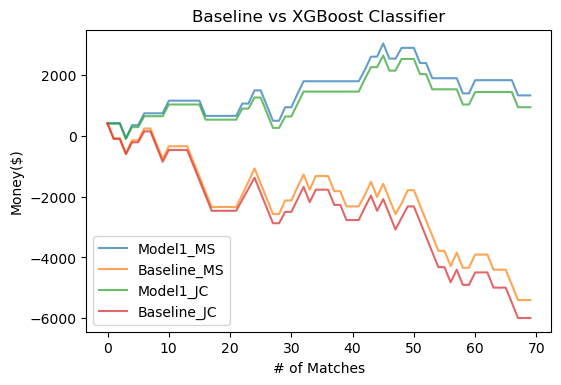

In [42]:
fin.plot(y=["Model1_MS", "Baseline_MS", "Model1_JC", "Baseline_JC"], alpha=0.7)
plt.title('Baseline vs XGBoost Classifier')
plt.xlabel('# of Matches')
plt.ylabel('Money($)')

plt.show()

In [43]:
fin = fin.drop(["Model1_MS", "Baseline_MS", "Model1_JC", "Baseline_JC"], axis=1)

In [44]:
# #betting on only 55% Confidence 
# macau_money = []
# macau_count = 0 
# hkjc_money = []
# hkjc_count = 0 
# prob = 0.55

# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob1'] >= prob:
#         # Macau
#         if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
#             macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
#             macau_money.append(macau_count)
#         elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
#             macau_money.append(macau_count)
#         else:
#             macau_count = macau_count - bet_amount
#             macau_money.append(macau_count)
            
#         # HKJC
#         if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
#             hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
#             hkjc_money.append(hkjc_count)
#         elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
#             hkjc_money.append(hkjc_count)
#         else:
#             hkjc_count = hkjc_count - bet_amount
#             hkjc_money.append(hkjc_count)
#     else:
#         macau_money.append(macau_count)
#         hkjc_money.append(hkjc_count)
    
# fin.loc[:, 'MS_PL_0.55'] = pd.Series(macau_money)
# fin.loc[:, 'JC_PL_0.55'] = pd.Series(hkjc_money)

In [45]:
#betting on only 60% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.6

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= prob:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
fin.loc[:, 'MS_PL_0.60'] = pd.Series(macau_money)
fin.loc[:, 'JC_PL_0.60'] = pd.Series(hkjc_money)

In [46]:
#betting on only 62% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.62

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= prob:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
fin.loc[:, 'MS_PL_0.62'] = pd.Series(macau_money)
fin.loc[:, 'JC_PL_0.62'] = pd.Series(hkjc_money)

In [47]:
#betting on only 65% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.65

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= prob:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
fin.loc[:, 'MS_PL_0.65'] = pd.Series(macau_money)
fin.loc[:, 'JC_PL_0.65'] = pd.Series(hkjc_money)

In [48]:
# hi_prob = 0.6
# print('MATCH_DATETIME > \'%s\'' % current_match_date)
# finq = fin.query('MATCH_DATETIME > \'%s\' & prob1>=%s' % (current_match_date, hi_prob))

# # finq.tail(20)
# # fin.tail(50)
# # fin.head(50)
# finq = finq.drop(['HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','OU25','prob0','Correct','PL 0.55','PL 0.6','PL 0.65','PL 0.7'], axis=1)
# finq

# fin = fin.drop(['MS_PL_0.55','JC_PL_0.55'], axis=1)
fin

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,TOTAL_GOAL_COUNT,OU25,prob0,prob1,pred,Correct_MS,Correct_JC,MS_PL_0.60,JC_PL_0.60,MS_PL_0.62,JC_PL_0.62,MS_PL_0.65,JC_PL_0.65
0,1908522,2020-09-02 18:00:00,TEST,日聯盃,大阪櫻花,柏雷素爾,0,3,2.50,0.85,0.85,2.5,0.80,0.90,3,1,0.312913,0.687087,1,1,1,425.0,400.0,425.0,400.0,425.0,400.0
1,1858402,2020-09-04 02:45:00,TEST,歐國聯,德國,西班牙,1,1,2.50,0.88,0.82,2.5,0.77,0.93,2,0,0.458851,0.541149,1,0,0,425.0,400.0,425.0,400.0,425.0,400.0
2,1908078,2020-09-05 00:30:00,TEST,英聯盃,米杜士堡,梳士貝利,4,3,2.50,0.94,0.76,2.5,0.82,0.88,7,1,0.656187,0.343813,0,1,1,425.0,400.0,425.0,400.0,425.0,400.0
3,1858369,2020-09-05 02:45:00,TEST,歐國聯,荷蘭,波蘭,1,0,2.50,0.89,0.81,2.5,0.72,1.00,1,0,0.369025,0.630975,1,0,0,-75.0,-100.0,-75.0,-100.0,425.0,400.0
4,1873071,2020-09-05 18:00:00,TEST,日職乙,北九州向日葵,甲府風林,0,3,2.50,0.86,0.84,2.5,0.78,0.92,3,1,0.341324,0.658676,1,1,1,355.0,290.0,355.0,290.0,855.0,790.0
5,1831421,2020-09-05 19:00:00,TEST,韓K聯,浦項制鐵,大邱FC,3,2,2.50,0.76,0.94,2.5,0.68,1.05,5,1,0.555670,0.444330,0,1,1,355.0,290.0,355.0,290.0,855.0,790.0
6,1908067,2020-09-05 20:00:00,TEST,英聯盃,卡維尼,米禾爾,1,3,2.50,0.78,0.92,2.5,0.72,1.00,4,1,0.301443,0.698557,1,1,1,745.0,650.0,745.0,650.0,1245.0,1150.0
7,1908057,2020-09-05 22:00:00,TEST,英聯盃,保頓,巴拉福特,1,2,2.50,0.90,0.80,2.5,0.82,0.88,3,1,0.623352,0.376648,0,1,1,745.0,650.0,745.0,650.0,1245.0,1150.0
8,1908091,2020-09-05 22:00:00,TEST,英聯盃,米爾頓凱恩斯,高雲地利,0,1,2.50,0.90,0.80,2.5,0.80,0.90,1,0,0.499477,0.500523,1,0,0,745.0,650.0,745.0,650.0,1245.0,1150.0
9,1858370,2020-09-05 23:59:00,TEST,歐國聯,冰島,英格蘭,0,1,2.50,0.85,0.85,2.5,0.68,1.05,1,0,0.422159,0.577841,1,0,0,745.0,650.0,745.0,650.0,1245.0,1150.0


In [49]:
# final = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_OU_MACAU_HDC', 'STR_OU_MACAU_HI', 'STR_OU_MACAU_LO', 'STR_OU_HKJC_HDC', 'STR_OU_HKJC_HI', 'STR_OU_HKJC_LO', 'TOTAL_GOAL_COUNT', ou_hdc]]

# final = final.query('ML_TYPE == "PREDICT"')

# y_pred = model1.predict(X_test)
# class_probabilities = model1.predict_proba(X_test)

# pred = pd.DataFrame(y_pred, columns=['pred'])
# prob = pd.DataFrame(class_probabilities, columns=['prob0','prob1' ])

# final.reset_index(drop=True, inplace=True)
# pred.reset_index(drop=True, inplace=True)
# prob.reset_index(drop=True, inplace=True)

# fin = pd.concat([final, prob, pred], axis=1)
predict = fin.query('ML_TYPE == "PREDICT"')
predict

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,TOTAL_GOAL_COUNT,OU25,prob0,prob1,pred,Correct_MS,Correct_JC,MS_PL_0.60,JC_PL_0.60,MS_PL_0.62,JC_PL_0.62,MS_PL_0.65,JC_PL_0.65


In [50]:
# final = fin.drop(['STR_OU_MACAU_HDC','STR_OU_MACAU_HI','STR_OU_MACAU_LO','OU25','Correct_MS','MS_PL_0.55','MS_PL_0.60','MS_PL_0.62','MS_PL_0.65'],axis=1)
final

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,TOTAL_GOAL_COUNT,OU25
0,1908522,2020-09-02 18:00:00,TEST,日聯盃,大阪櫻花,柏雷素爾,0,3,2.50,0.85,0.85,2.5,0.80,0.90,3,1
1,1858402,2020-09-04 02:45:00,TEST,歐國聯,德國,西班牙,1,1,2.50,0.88,0.82,2.5,0.77,0.93,2,0
2,1908078,2020-09-05 00:30:00,TEST,英聯盃,米杜士堡,梳士貝利,4,3,2.50,0.94,0.76,2.5,0.82,0.88,7,1
3,1858369,2020-09-05 02:45:00,TEST,歐國聯,荷蘭,波蘭,1,0,2.50,0.89,0.81,2.5,0.72,1.00,1,0
4,1873071,2020-09-05 18:00:00,TEST,日職乙,北九州向日葵,甲府風林,0,3,2.50,0.86,0.84,2.5,0.78,0.92,3,1
5,1831421,2020-09-05 19:00:00,TEST,韓K聯,浦項制鐵,大邱FC,3,2,2.50,0.76,0.94,2.5,0.68,1.05,5,1
6,1908067,2020-09-05 20:00:00,TEST,英聯盃,卡維尼,米禾爾,1,3,2.50,0.78,0.92,2.5,0.72,1.00,4,1
7,1908057,2020-09-05 22:00:00,TEST,英聯盃,保頓,巴拉福特,1,2,2.50,0.90,0.80,2.5,0.82,0.88,3,1
8,1908091,2020-09-05 22:00:00,TEST,英聯盃,米爾頓凱恩斯,高雲地利,0,1,2.50,0.90,0.80,2.5,0.80,0.90,1,0
9,1858370,2020-09-05 23:59:00,TEST,歐國聯,冰島,英格蘭,0,1,2.50,0.85,0.85,2.5,0.68,1.05,1,0


In [51]:
# col_ml_type = '253'

# # Remove previous record
# sql = 'DELETE FROM OU_PREDICT WHERE ML_TYPE=:col_ml_type AND MATCH_DATE=:db_match_date'
# c.execute(sql, [col_ml_type,db_match_date])

# data_to_insert = []
# # Insert db
# for i,j in finq.iterrows():
#     col_match_id = int(fin.loc[i, 'MATCH_ID'])
#     col_match_datetime = str(fin.loc[i, 'MATCH_DATETIME'])
#     col_league = str(fin.loc[i, 'LEAGUE'])
#     col_home_team = str(fin.loc[i, 'HOME_TEAM'])
#     col_away_team = str(fin.loc[i, 'AWAY_TEAM'])
#     col_str_ou_macau_hdc = float(fin.loc[i, 'STR_OU_MACAU_HDC'])
#     col_str_ou_macau_hi = float(fin.loc[i, 'STR_OU_MACAU_HI'])
#     col_str_ou_macau_lo = float(fin.loc[i, 'STR_OU_MACAU_LO'])
#     col_str_ou_hkjc_hdc = float(fin.loc[i, 'STR_OU_HKJC_HDC'])
#     col_str_ou_hkjc_hi = float(fin.loc[i, 'STR_OU_HKJC_HI'])
#     col_str_ou_hkjc_lo = float(fin.loc[i, 'STR_OU_HKJC_LO'])
#     col_prob1 = float(fin.loc[i, 'prob1'])
#     data_to_insert.append([col_ml_type,col_match_id,col_match_datetime,col_league,col_home_team,col_away_team,col_str_ou_macau_hdc,col_str_ou_macau_hi,col_str_ou_macau_lo,col_str_ou_hkjc_hdc,col_str_ou_hkjc_hi,col_str_ou_hkjc_lo,col_prob1,db_match_date])

# sql = 'INSERT INTO OU_PREDICT (ML_TYPE,MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,HI_PROB,MATCH_DATE) VALUES (:col_ml_type,:col_match_id,TO_DATE(:col_match_datetime,\'YYYY-MM-DD HH24:MI:SS\'),:col_league,:col_home_team,:col_away_team,:col_str_ou_macau_hdc,:col_str_ou_macau_hi,:col_str_ou_macau_lo,:col_str_ou_hkjc_hdc,:col_str_ou_hkjc_hi,:col_str_ou_hkjc_lo,:col_prob1,:db_match_date)'
# c.executemany(sql, data_to_insert)
# connection.commit()

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__n_estimators':[20,50,100,200],
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__max_features':[0.25,3,5],
    'randomforestclassifier__min_samples_split':[3,5,15],
    'randomforestclassifier__min_samples_leaf':[2,5],
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished


In [53]:
print('Cross-validation Best Score:', search.best_score_)
print('Best Estimator:', search.best_params_)
print('Best Model:', search.best_estimator_)

Cross-validation Best Score: 0.5396638655462185
Best Estimator: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 15, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 0.25, 'randomforestclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.25, min_samples_leaf=2,
                                        min_samples_split=15, n_estimators=200,
                                        n_jobs=-1, random_state=42))])
